## IMPORT LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import os
import csv
from zipfile import ZipFile
from datetime import datetime
from sklearn import preprocessing

## IMPORT DATASETS

In [5]:
Test=pd.read_excel('Test.xlsx',sheet_name='Sheet1')
Train=pd.read_excel('Train.xlsx',sheet_name='Sheet1')

## EXPLORE

### DATA EXPLORATION

In [6]:
Train.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1


In [7]:
Train.shape

(22400, 15)

In [8]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CITIZEN_ID              22400 non-null  int64 
 1   Name                    22400 non-null  object
 2   Birthday                22400 non-null  object
 3   Native Continent        22400 non-null  object
 4   Marital Status          22400 non-null  object
 5   Lives with              22400 non-null  object
 6   Base Area               22400 non-null  object
 7   Education Level         22400 non-null  object
 8   Years of Education      22400 non-null  int64 
 9   Employment Sector       22400 non-null  object
 10  Role                    22400 non-null  object
 11  Working Hours per week  22400 non-null  int64 
 12  Money Received          22400 non-null  int64 
 13  Ticket Price            22400 non-null  int64 
 14  Income                  22400 non-null  int64 
dtypes:

In [9]:
Train[['Years of Education', 'Working Hours per week', 'Money Received', 'Ticket Price', 'Income']].describe()

,Years of Education,Working Hours per week,Money Received,Ticket Price,Income
count,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000
mean,13.173884,40.483795,1324.915357,109.145313,0.237098
std,2.512451,12.370921,9227.771813,500.208904,0.425313
min,2.000000,1.000000,0.000000,0.000000,0.000000
25%,12.000000,40.000000,0.000000,0.000000,0.000000
50%,13.000000,40.000000,0.000000,0.000000,0.000000
75%,15.000000,45.000000,0.000000,0.000000,0.000000
max,21.000000,99.000000,122999.000000,5358.000000,1.000000


In [10]:
Train['Income'].value_counts(normalize=True)

0    0.762902
1    0.237098
Name: Income, dtype: float64

The first phase of this process is to identify the people who belong to each class. To this end, a first income analysis was made to 32500 people older than 17 years old, from which the government intends to create a predictive model to apply to people on their way to Newland.

In [11]:
# Create a new column 'Group' in the train dataset
groups = []
for i in range(len(Train)):
    if Train['Money Received'][i] > 0:
        groups.append('B')
    elif Train['Ticket Price'][i] > 0:
        groups.append('C')
    else:
        groups.append('A')
Train['Group'] = groups
Train

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Group
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1,C
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1,A
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1,C
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1,B
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,34881,Mrs. Lisa Alsop,"March 15,2023",Europe,Divorced,Children,Northbury,Professional School,12,Private Sector - Services,Cleaners & Handlers,40,0,0,0,A
22396,34882,Mr. Julian Coleman,"March 7,2025",Europe,Single,Children,Northbury,Professional School,12,Private Sector - Services,Other services,35,0,0,0,A
22397,34883,Miss Amelia Walker,"July 20,2022",Europe,Single,Other Family,Northbury,Masters,17,Public Sector - Others,Professor,40,2674,0,0,B
22398,34884,Mr. Justin Sutherland,"June 11,2011",Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Repair & constructions,90,0,0,1,A


## Missing values analysis

Number of missing values by variable

In [12]:
Train.isnull().sum()

CITIZEN_ID                0
Name                      0
Birthday                  0
Native Continent          0
Marital Status            0
Lives with                0
Base Area                 0
Education Level           0
Years of Education        0
Employment Sector         0
Role                      0
Working Hours per week    0
Money Received            0
Ticket Price              0
Income                    0
Group                     0
dtype: int64

In [16]:
Test.isnull().sum()

CITIZEN_ID                0
Name                      0
Birthday                  0
Native Continent          0
Marital Status            0
Lives with                0
Base Area                 0
Education Level           0
Years of Education        0
Employment Sector         0
Role                      0
Working Hours per week    0
Money Received            0
Ticket Price              0
dtype: int64

## Outlier analysis

In [13]:
# Non categorical features
non_cat = Train[['Years of Education', 'Working Hours per week', 'Ticket Price', 'Money Received']]

### Years of Education

<AxesSubplot:xlabel='Years of Education', ylabel='Probability'>

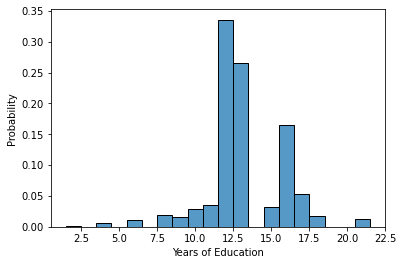

In [14]:
#VER NOVAMENTE 
sns.histplot(data=Train, x='Years of Education', stat="probability", discrete=True)

/Users/sofia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Years of Education', ylabel='Density'>

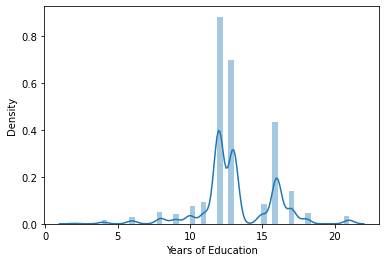

In [15]:
# Add a graph in each part
sns.distplot(Train['Years of Education'])

In [16]:
hk_mean = Train['Years of Education'].mean()
hk_std = Train['Years of Education'].std()

Train.loc[Train['Years of Education'] > hk_mean + 5 * hk_std]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Group


In [17]:
Train.loc[Train['Years of Education'] < hk_mean - 5 * hk_std]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Group


In [18]:
# calculate mean
mean = np.mean(Train['Years of Education'])
# calculate standard deviation
sd = np.std(Train['Years of Education'])
# determine a threhold
threshold = 5
# create empty list to store outliers
outliers = []
# detect outlier
for i in Train['Years of Education']: 
    z = (i-mean)/sd # calculate z-score
    if abs(z) > threshold:  # identify outliers
        outliers.append(i) # add to the empty list
# print outliers    
print("The detected outliers are: ", len(outliers))

The detected outliers are:  0


### Working Hours per Week

/Users/miguelcoutinhonunes/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/miguelcoutinhonunes/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Working Hours per week', ylabel='Density'>

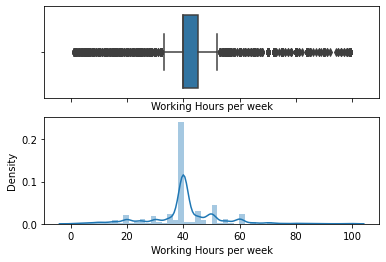

In [32]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (3, 3.5)})
# Add a graph in each part
sns.boxplot(Train['Working Hours per week'], ax=ax_box)
sns.distplot(Train['Working Hours per week'], ax=ax_hist)

In [78]:
# calculate mean
mean = np.mean(Train['Working Hours per week'])
# calculate standard deviation
sd = np.std(Train['Working Hours per week'])
# determine a threhold
threshold = 5
# create empty list to store outliers
outliers = []
# detect outlier
for i in Train['Working Hours per week']: 
    z = (i-mean)/sd # calculate z-score
    if abs(z) > threshold:  # identify outliers
        outliers.append(i) # add to the empty list
# print outliers    
print("The detected outliers are: ", len(outliers))

The detected outliers are:  0


In [82]:
hk_mean = Train['Working Hours per week'].mean()
hk_std = Train['Working Hours per week'].std()

Train.loc[Train['Working Hours per week'] > hk_mean + 5 * hk_std]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Group


In [86]:
Train.loc[Train['Working Hours per week'] < hk_mean - 5 * hk_std]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Group


### Ticket Price

/Users/miguelcoutinhonunes/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/miguelcoutinhonunes/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ticket Price', ylabel='Density'>

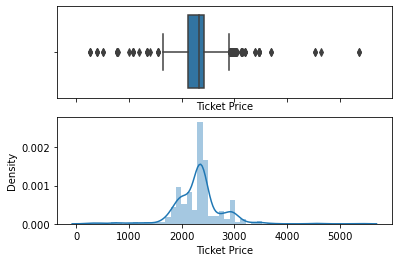

In [34]:
# Filtering the positives price of ticket
positive_price = non_cat[non_cat['Ticket Price']>0]['Ticket Price']
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (3, 3.5)})
# Add a graph in each part
sns.boxplot(positive_price, ax=ax_box)
sns.distplot(positive_price, ax=ax_hist)

In [135]:
# calculate mean
mean = np.mean(Train['Ticket Price'])
# calculate standard deviation
sd = np.std(Train['Ticket Price'])
# determine a threhold
threshold = 5
# create empty list to store outliers
outliers_TP = []
# detect outlier
for i in Train['Ticket Price']: 
    z = (i-mean)/sd # calculate z-score
    if abs(z) > threshold:  # identify outliers
        outliers_TP.append(i) # add to the empty list
# print outliers    
print("The detected outliers are: ", len(outliers_TP))
print("The detected outliers are: ", list(np.unique(outliers_TP)))

The detected outliers are:  178
The detected outliers are:  [2619, 2643, 2660, 2674, 2680, 2707, 2712, 2713, 2744, 2753, 2763, 2777, 2788, 2807, 2877, 2893, 2924, 2942, 2970, 3006, 3022, 3034, 3041, 3133, 3148, 3202, 3387, 3474, 3695, 4530, 4637, 5358]


In [81]:
hk_mean = Train['Ticket Price'].mean()
hk_std = Train['Ticket Price'].std()

Train.loc[Train['Ticket Price'] > hk_mean + 5 * hk_std]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Group
41,12527,Mr. Sean Stewart,"July 15,1990",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Self-Employed (Individual),Agriculture and Fishing,40,0,2970,1,C
176,12662,Mrs. Kylie Walker,"March 1,2017",Europe,Married,Husband,Northbury,Professional School,12,Self-Employed (Individual),Other services,40,0,2970,1,C
252,12738,Mr. Andrew Grant,"February 13,1977",Europe,Married,Wife,Northbury,Bachelors + PostGraduation,16,Self-Employed (Company),Management,60,0,2942,1,C
375,12861,Mr. Neil Morgan,"April 5,1978",Europe,Married,Wife,Northbury,Masters,17,Self-Employed (Individual),Management,8,0,2763,1,C
847,13333,Mr. Lucas Hardacre,"August 1,1988",Europe,Married,Wife,Northbury,Masters + PostGraduation,18,Self-Employed (Company),Professor,80,0,2970,1,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22026,34512,Mrs. Rachel Poole,"February 14,2000",Europe,Divorced,Other Family,Northbury,Professional School,12,Private Sector - Services,Management,40,0,2777,1,C
22154,34640,Mr. Evan King,"January 6,2011",Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Management,40,0,3474,1,C
22166,34652,Mr. Jason Kelly,"February 12,1998",Europe,Married,Wife,Northbury,Masters + PostGraduation,18,Self-Employed (Individual),Professor,30,0,2970,1,C
22169,34655,Mr. Simon Fraser,"January 4,2025",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,40,0,2924,0,C


In [85]:
Train.loc[Train['Ticket Price'] < hk_mean - 5 * hk_std]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Group


### Money Received

/Users/miguelcoutinhonunes/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/miguelcoutinhonunes/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Money Received', ylabel='Density'>

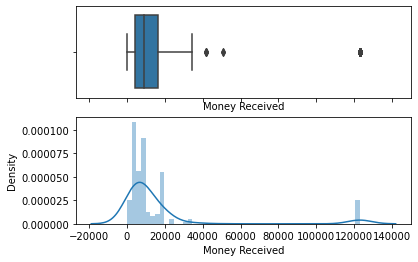

In [37]:
# Filtering the positives "Money Received"
positive_money_received = non_cat[non_cat['Money Received']>0]['Money Received']
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (3, 3.5)})
# Add a graph in each part
sns.boxplot(positive_money_received, ax=ax_box)
sns.distplot(positive_money_received, ax=ax_hist)

In [136]:
# calculate mean
mean = np.mean(Train['Money Received'])
# calculate standard deviation
sd = np.std(Train['Money Received'])
# determine a threhold
threshold = 5
# create empty list to store outliers
outliers_MR = []
# detect outlier
for i in Train['Money Received']: 
    z = (i-mean)/sd # calculate z-score
    if abs(z) > threshold:  # identify outliers
        outliers_MR.append(i) # add to the empty list
# print outliers    
print("The detected outliers are: ", len(outliers_MR))
print("The detected outliers are: ", list(np.unique(outliers_MR)))

The detected outliers are:  116
The detected outliers are:  [50811, 122999]


In [80]:
hk_mean = Train['Money Received'].mean()
hk_std = Train['Money Received'].std()

Train.loc[Train['Money Received'] > hk_mean + 5 * hk_std]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Group
181,12667,Mr. Alexander Duncan,"March 17,1997",Oceania,Married,Wife,Sharnwick,Masters + PostGraduation,18,Self-Employed (Individual),Professor,70,122999,0,1,B
353,12839,Mr. Sam Black,"May 26,1985",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Repair & constructions,40,122999,0,1,B
877,13363,Mr. Jason Dickens,"January 20,2009",Europe,Married,Wife,Northbury,Masters,17,Private Sector - Services,Professor,40,122999,0,1,B
933,13419,Mr. Harry Parr,"September 29,1999",Europe,Married,Wife,Northbury,Masters,17,Private Sector - Others,Sales,80,122999,0,1,B
959,13445,Mr. Jacob Wilson,"June 28,2008",Europe,Married,Wife,Northbury,Masters + PostGraduation,18,Self-Employed (Individual),Professor,70,122999,0,1,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21558,34044,Mrs. Rebecca Hamilton,"March 24,2002",Europe,Divorced,Other Family,Northbury,Bachelors + PostGraduation,16,Public Sector - Others,Administratives,40,122999,0,1,B
21713,34199,Mrs. Caroline Avery,"June 30,1997",Europe,Married,Husband,Northbury,Masters,17,Private Sector - Services,Professor,50,122999,0,1,B
21863,34349,Mr. Charles Butler,"January 18,2002",Europe,Married,Wife,Northbury,Masters + PostGraduation,18,Private Sector - Services,Professor,50,122999,0,1,B
21878,34364,Mr. Richard Mackay,"September 1,1991",Europe,Married,Wife,Northbury,Masters,17,Self-Employed (Company),Sales,40,122999,0,1,B


In [83]:
Train.loc[Train['Money Received'] < hk_mean - 5 * hk_std]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Group


In [162]:
outliers_TP=list(np.unique(outliers_TP))
data_TP=Train[Train['Ticket Price'].isin(outliers_TP)]['Ticket Price'].index
data_TP

Int64Index([   41,   176,   252,   375,   847,  1033,  1341,  1383,  1488,
             1528,
            ...
            21543, 21545, 21769, 21771, 21789, 22026, 22154, 22166, 22169,
            22326],
           dtype='int64', length=178)

In [163]:
outliers_MR=list(np.unique(outliers_MR))
data_MR=Train[Train['Money Received'].isin(outliers_MR)]['Money Received'].index
data_MR

Int64Index([  181,   353,   877,   933,   959,  1071,  1273,  1323,  1584,
             1627,
            ...
            20720, 20882, 20945, 21038, 21224, 21558, 21713, 21863, 21878,
            22209],
           dtype='int64', length=116)

In [182]:
INDEX=data_TP.union(data_MR)
Train.loc[INDEX]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Group,Outlier
41,12527,Mr. Sean Stewart,"July 15,1990",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Self-Employed (Individual),Agriculture and Fishing,40,0,2970,1,C,0
176,12662,Mrs. Kylie Walker,"March 1,2017",Europe,Married,Husband,Northbury,Professional School,12,Self-Employed (Individual),Other services,40,0,2970,1,C,0
181,12667,Mr. Alexander Duncan,"March 17,1997",Oceania,Married,Wife,Sharnwick,Masters + PostGraduation,18,Self-Employed (Individual),Professor,70,122999,0,1,B,0
252,12738,Mr. Andrew Grant,"February 13,1977",Europe,Married,Wife,Northbury,Bachelors + PostGraduation,16,Self-Employed (Company),Management,60,0,2942,1,C,0
353,12839,Mr. Sam Black,"May 26,1985",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Repair & constructions,40,122999,0,1,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22154,34640,Mr. Evan King,"January 6,2011",Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Management,40,0,3474,1,C,0
22166,34652,Mr. Jason Kelly,"February 12,1998",Europe,Married,Wife,Northbury,Masters + PostGraduation,18,Self-Employed (Individual),Professor,30,0,2970,1,C,0
22169,34655,Mr. Simon Fraser,"January 4,2025",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,40,0,2924,0,C,0
22209,34695,Mr. Gavin Parsons,"March 6,2004",Europe,Married,Wife,Northbury,Bachelors + PostGraduation,16,Self-Employed (Company),Management,70,122999,0,1,B,0


In [189]:
Train['Outlier'] = 0 
Train.loc[INDEX, 'Outlier'] = 1
Train['Outlier'].value_counts()

0    22106
1      294
Name: Outlier, dtype: int64

In [191]:
Train = Train.loc[Train['Outlier'] == 0]
Train

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Group,Outlier
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1,C,0
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1,A,0
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1,C,0
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1,B,0
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,34881,Mrs. Lisa Alsop,"March 15,2023",Europe,Divorced,Children,Northbury,Professional School,12,Private Sector - Services,Cleaners & Handlers,40,0,0,0,A,0
22396,34882,Mr. Julian Coleman,"March 7,2025",Europe,Single,Children,Northbury,Professional School,12,Private Sector - Services,Other services,35,0,0,0,A,0
22397,34883,Miss Amelia Walker,"July 20,2022",Europe,Single,Other Family,Northbury,Masters,17,Public Sector - Others,Professor,40,2674,0,0,B,0
22398,34884,Mr. Justin Sutherland,"June 11,2011",Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Repair & constructions,90,0,0,1,A,0


## Modify

### Transform and create variables

#### Variable 'Birthday_year'

In [318]:
Train1 = Train.copy()
Test1= Test.copy()

In [319]:
# Create a new column 'Birthday_year' in Train dataset
Train1['Birthday_year'] = Train1['Birthday'].str.split(",").str[1]
Train1.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Group,Outlier,Birthday_year
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,0,13,Private Sector - Services,Repair & constructions,40,0,2273,1,C,0,2003
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,1,12,Public Sector - Others,Repair & constructions,40,0,0,1,A,0,2006
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,1,12,Private Sector - Services,Sales,46,0,2321,1,C,0,2009
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,2,11,Private Sector - Services,Security,37,5395,0,1,B,0,1985
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,3,21,Self-Employed (Individual),Professor,45,0,0,1,A,0,2015


In [320]:
# Create a new column 'Birthday_year' in Test dataset
Test1['Birthday_year'] = Test1['Birthday'].str.split(",").str[1]
Test1.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Birthday_year
0,34886,Mr. Dan Kerr,"May 13,2012",Europe,Married,Wife,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Sales,40,0,0,2012
1,34887,Miss Olivia Grant,"August 9,2014",Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Professor,36,0,0,2014
2,34888,Mr. Trevor Simpson,"May 23,2020",Europe,Divorced,Other Family,Northbury,Professional School + PostGraduation,13,Private Sector - Services,Management,50,12940,0,2020
3,34889,Mr. David Clark,"April 15,2016",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Professor,48,0,1827,2016
4,34890,Mr. Gavin Lambert,"April 22,2011",Europe,Married,Wife,Watford,Bachelors,15,Public Sector - Others,Professor,45,0,0,2011


In [321]:
Train1['Birthday_year'] = Train1['Birthday_year'].astype(int)

In [322]:
Test1['Birthday_year'] = Test1['Birthday_year'].astype(int)

In [323]:
# Create column 'Age'
Train1['Age'] = 2048 - Train1['Birthday_year']
Train1.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Group,Outlier,Birthday_year,Age
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,0,13,Private Sector - Services,Repair & constructions,40,0,2273,1,C,0,2003,45
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,1,12,Public Sector - Others,Repair & constructions,40,0,0,1,A,0,2006,42
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,1,12,Private Sector - Services,Sales,46,0,2321,1,C,0,2009,39
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,2,11,Private Sector - Services,Security,37,5395,0,1,B,0,1985,63
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,3,21,Self-Employed (Individual),Professor,45,0,0,1,A,0,2015,33


In [324]:
# Create column 'Age'
Test1['Age'] = 2048 - Test1['Birthday_year']
Test1.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Birthday_year,Age
0,34886,Mr. Dan Kerr,"May 13,2012",Europe,Married,Wife,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Sales,40,0,0,2012,36
1,34887,Miss Olivia Grant,"August 9,2014",Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Professor,36,0,0,2014,34
2,34888,Mr. Trevor Simpson,"May 23,2020",Europe,Divorced,Other Family,Northbury,Professional School + PostGraduation,13,Private Sector - Services,Management,50,12940,0,2020,28
3,34889,Mr. David Clark,"April 15,2016",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Professor,48,0,1827,2016,32
4,34890,Mr. Gavin Lambert,"April 22,2011",Europe,Married,Wife,Watford,Bachelors,15,Public Sector - Others,Professor,45,0,0,2011,37


#### Variable 'Native Continent'

In [325]:
native_cont = Train1['Native Continent'].unique()
j=0
for j, i in enumerate(native_cont):
    Train1['Native Continent'].loc[Train1['Native Continent'] == i] = j
    j=j+1

Train1

/Users/miguelcoutinhonunes/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Group,Outlier,Birthday_year,Age
0,12486,Mr. Adam Glover,"July 1,2003",0,Married,Wife,Northbury,0,13,Private Sector - Services,Repair & constructions,40,0,2273,1,C,0,2003,45
1,12487,Mr. Cameron McDonald,"January 25,2006",0,Married,Wife,Northbury,1,12,Public Sector - Others,Repair & constructions,40,0,0,1,A,0,2006,42
2,12488,Mr. Keith Davidson,"May 10,2009",0,Married,Wife,Northbury,1,12,Private Sector - Services,Sales,46,0,2321,1,C,0,2009,39
3,12489,Mr. Alexander Gill,"March 25,1985",0,Married,Wife,Northbury,2,11,Private Sector - Services,Security,37,5395,0,1,B,0,1985,63
4,12490,Mr. Neil Piper,"May 29,2015",0,Single,Other Family,Northbury,3,21,Self-Employed (Individual),Professor,45,0,0,1,A,0,2015,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,34881,Mrs. Lisa Alsop,"March 15,2023",0,Divorced,Children,Northbury,1,12,Private Sector - Services,Cleaners & Handlers,40,0,0,0,A,0,2023,25
22396,34882,Mr. Julian Coleman,"March 7,2025",0,Single,Children,Northbury,1,12,Private Sector - Services,Other services,35,0,0,0,A,0,2025,23
22397,34883,Miss Amelia Walker,"July 20,2022",0,Single,Other Family,Northbury,6,17,Public Sector - Others,Professor,40,2674,0,0,B,0,2022,26
22398,34884,Mr. Justin Sutherland,"June 11,2011",0,Single,Other Family,Northbury,5,16,Private Sector - Services,Repair & constructions,90,0,0,1,A,0,2011,37


In [326]:
native_cont = Test1['Native Continent'].unique()
j=0
for j, i in enumerate(native_cont):
    Test1['Native Continent'].loc[Test1['Native Continent'] == i] = j
    j=j+1

Test1

/Users/miguelcoutinhonunes/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Birthday_year,Age
0,34886,Mr. Dan Kerr,"May 13,2012",0,Married,Wife,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Sales,40,0,0,2012,36
1,34887,Miss Olivia Grant,"August 9,2014",0,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Professor,36,0,0,2014,34
2,34888,Mr. Trevor Simpson,"May 23,2020",0,Divorced,Other Family,Northbury,Professional School + PostGraduation,13,Private Sector - Services,Management,50,12940,0,2020,28
3,34889,Mr. David Clark,"April 15,2016",0,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Professor,48,0,1827,2016,32
4,34890,Mr. Gavin Lambert,"April 22,2011",0,Married,Wife,Watford,Bachelors,15,Public Sector - Others,Professor,45,0,0,2011,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,44981,Mr. Victor Cornish,"June 12,2012",0,Married,Wife,Northbury,Masters,17,Private Sector - Services,Professor,60,0,2432,2012,36
10096,44982,Mr. Benjamin Jones,"March 26,2000",0,Divorced,Other Family,Northbury,Masters,17,Private Sector - Services,Management,50,122999,0,2000,48
10097,44983,Miss Jennifer Rampling,"January 28,2022",0,Single,Alone,Northbury,High School + PostGraduation,13,Public Sector - Government,Administratives,15,0,0,2022,26
10098,44984,Miss Kimberly Rampling,"July 22,2024",0,Single,Children,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Administratives,40,0,0,2024,24


#### Variable 'Marital Status'

In [327]:
matital_stat = Train1['Marital Status'].unique()
j=0
for j, i in enumerate(matital_stat):
    Train1['Marital Status'].loc[Train1['Marital Status'] == i] = j
    j=j+1

Train1

/Users/miguelcoutinhonunes/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Group,Outlier,Birthday_year,Age
0,12486,Mr. Adam Glover,"July 1,2003",0,0,Wife,Northbury,0,13,Private Sector - Services,Repair & constructions,40,0,2273,1,C,0,2003,45
1,12487,Mr. Cameron McDonald,"January 25,2006",0,0,Wife,Northbury,1,12,Public Sector - Others,Repair & constructions,40,0,0,1,A,0,2006,42
2,12488,Mr. Keith Davidson,"May 10,2009",0,0,Wife,Northbury,1,12,Private Sector - Services,Sales,46,0,2321,1,C,0,2009,39
3,12489,Mr. Alexander Gill,"March 25,1985",0,0,Wife,Northbury,2,11,Private Sector - Services,Security,37,5395,0,1,B,0,1985,63
4,12490,Mr. Neil Piper,"May 29,2015",0,1,Other Family,Northbury,3,21,Self-Employed (Individual),Professor,45,0,0,1,A,0,2015,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,34881,Mrs. Lisa Alsop,"March 15,2023",0,3,Children,Northbury,1,12,Private Sector - Services,Cleaners & Handlers,40,0,0,0,A,0,2023,25
22396,34882,Mr. Julian Coleman,"March 7,2025",0,1,Children,Northbury,1,12,Private Sector - Services,Other services,35,0,0,0,A,0,2025,23
22397,34883,Miss Amelia Walker,"July 20,2022",0,1,Other Family,Northbury,6,17,Public Sector - Others,Professor,40,2674,0,0,B,0,2022,26
22398,34884,Mr. Justin Sutherland,"June 11,2011",0,1,Other Family,Northbury,5,16,Private Sector - Services,Repair & constructions,90,0,0,1,A,0,2011,37


In [328]:
matital_stat = Test1['Marital Status'].unique()
j=0
for j, i in enumerate(matital_stat):
    Test1['Marital Status'].loc[Test1['Marital Status'] == i] = j
    j=j+1

Test1

/Users/miguelcoutinhonunes/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Birthday_year,Age
0,34886,Mr. Dan Kerr,"May 13,2012",0,0,Wife,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Sales,40,0,0,2012,36
1,34887,Miss Olivia Grant,"August 9,2014",0,1,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Professor,36,0,0,2014,34
2,34888,Mr. Trevor Simpson,"May 23,2020",0,2,Other Family,Northbury,Professional School + PostGraduation,13,Private Sector - Services,Management,50,12940,0,2020,28
3,34889,Mr. David Clark,"April 15,2016",0,0,Wife,Northbury,Professional School,12,Private Sector - Services,Professor,48,0,1827,2016,32
4,34890,Mr. Gavin Lambert,"April 22,2011",0,0,Wife,Watford,Bachelors,15,Public Sector - Others,Professor,45,0,0,2011,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,44981,Mr. Victor Cornish,"June 12,2012",0,0,Wife,Northbury,Masters,17,Private Sector - Services,Professor,60,0,2432,2012,36
10096,44982,Mr. Benjamin Jones,"March 26,2000",0,2,Other Family,Northbury,Masters,17,Private Sector - Services,Management,50,122999,0,2000,48
10097,44983,Miss Jennifer Rampling,"January 28,2022",0,1,Alone,Northbury,High School + PostGraduation,13,Public Sector - Government,Administratives,15,0,0,2022,26
10098,44984,Miss Kimberly Rampling,"July 22,2024",0,1,Children,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Administratives,40,0,0,2024,24


#### Variable 'Lives with'

In [329]:
lives_w = Train1['Lives with'].unique()
j=0
for j, i in enumerate(lives_w):
    Train1['Lives with'].loc[Train1['Lives with'] == i] = j
    j=j+1

Train1

/Users/miguelcoutinhonunes/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Group,Outlier,Birthday_year,Age
0,12486,Mr. Adam Glover,"July 1,2003",0,0,0,Northbury,0,13,Private Sector - Services,Repair & constructions,40,0,2273,1,C,0,2003,45
1,12487,Mr. Cameron McDonald,"January 25,2006",0,0,0,Northbury,1,12,Public Sector - Others,Repair & constructions,40,0,0,1,A,0,2006,42
2,12488,Mr. Keith Davidson,"May 10,2009",0,0,0,Northbury,1,12,Private Sector - Services,Sales,46,0,2321,1,C,0,2009,39
3,12489,Mr. Alexander Gill,"March 25,1985",0,0,0,Northbury,2,11,Private Sector - Services,Security,37,5395,0,1,B,0,1985,63
4,12490,Mr. Neil Piper,"May 29,2015",0,1,1,Northbury,3,21,Self-Employed (Individual),Professor,45,0,0,1,A,0,2015,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,34881,Mrs. Lisa Alsop,"March 15,2023",0,3,2,Northbury,1,12,Private Sector - Services,Cleaners & Handlers,40,0,0,0,A,0,2023,25
22396,34882,Mr. Julian Coleman,"March 7,2025",0,1,2,Northbury,1,12,Private Sector - Services,Other services,35,0,0,0,A,0,2025,23
22397,34883,Miss Amelia Walker,"July 20,2022",0,1,1,Northbury,6,17,Public Sector - Others,Professor,40,2674,0,0,B,0,2022,26
22398,34884,Mr. Justin Sutherland,"June 11,2011",0,1,1,Northbury,5,16,Private Sector - Services,Repair & constructions,90,0,0,1,A,0,2011,37


In [330]:
lives_w = Test1['Lives with'].unique()
j=0
for j, i in enumerate(lives_w):
    Test1['Lives with'].loc[Test1['Lives with'] == i] = j
    j=j+1

Test1

/Users/miguelcoutinhonunes/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Birthday_year,Age
0,34886,Mr. Dan Kerr,"May 13,2012",0,0,0,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Sales,40,0,0,2012,36
1,34887,Miss Olivia Grant,"August 9,2014",0,1,1,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Professor,36,0,0,2014,34
2,34888,Mr. Trevor Simpson,"May 23,2020",0,2,1,Northbury,Professional School + PostGraduation,13,Private Sector - Services,Management,50,12940,0,2020,28
3,34889,Mr. David Clark,"April 15,2016",0,0,0,Northbury,Professional School,12,Private Sector - Services,Professor,48,0,1827,2016,32
4,34890,Mr. Gavin Lambert,"April 22,2011",0,0,0,Watford,Bachelors,15,Public Sector - Others,Professor,45,0,0,2011,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,44981,Mr. Victor Cornish,"June 12,2012",0,0,0,Northbury,Masters,17,Private Sector - Services,Professor,60,0,2432,2012,36
10096,44982,Mr. Benjamin Jones,"March 26,2000",0,2,1,Northbury,Masters,17,Private Sector - Services,Management,50,122999,0,2000,48
10097,44983,Miss Jennifer Rampling,"January 28,2022",0,1,3,Northbury,High School + PostGraduation,13,Public Sector - Government,Administratives,15,0,0,2022,26
10098,44984,Miss Kimberly Rampling,"July 22,2024",0,1,4,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Administratives,40,0,0,2024,24


#### Variable 'Base Area'

#### Variable 'Education Level'

In [331]:
educ_level = Train1['Education Level'].unique()
j=0
for j, i in enumerate(educ_level):
    Train1['Education Level'].loc[Train1['Education Level'] == i] = j
    j=j+1

Train1

/Users/miguelcoutinhonunes/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Group,Outlier,Birthday_year,Age
0,12486,Mr. Adam Glover,"July 1,2003",0,0,0,Northbury,0,13,Private Sector - Services,Repair & constructions,40,0,2273,1,C,0,2003,45
1,12487,Mr. Cameron McDonald,"January 25,2006",0,0,0,Northbury,1,12,Public Sector - Others,Repair & constructions,40,0,0,1,A,0,2006,42
2,12488,Mr. Keith Davidson,"May 10,2009",0,0,0,Northbury,1,12,Private Sector - Services,Sales,46,0,2321,1,C,0,2009,39
3,12489,Mr. Alexander Gill,"March 25,1985",0,0,0,Northbury,2,11,Private Sector - Services,Security,37,5395,0,1,B,0,1985,63
4,12490,Mr. Neil Piper,"May 29,2015",0,1,1,Northbury,3,21,Self-Employed (Individual),Professor,45,0,0,1,A,0,2015,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,34881,Mrs. Lisa Alsop,"March 15,2023",0,3,2,Northbury,1,12,Private Sector - Services,Cleaners & Handlers,40,0,0,0,A,0,2023,25
22396,34882,Mr. Julian Coleman,"March 7,2025",0,1,2,Northbury,1,12,Private Sector - Services,Other services,35,0,0,0,A,0,2025,23
22397,34883,Miss Amelia Walker,"July 20,2022",0,1,1,Northbury,6,17,Public Sector - Others,Professor,40,2674,0,0,B,0,2022,26
22398,34884,Mr. Justin Sutherland,"June 11,2011",0,1,1,Northbury,5,16,Private Sector - Services,Repair & constructions,90,0,0,1,A,0,2011,37


In [332]:
educ_level = Test1['Education Level'].unique()
j=0
for j, i in enumerate(educ_level):
    Test1['Education Level'].loc[Test1['Education Level'] == i] = j
    j=j+1

Test1

/Users/miguelcoutinhonunes/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Birthday_year,Age
0,34886,Mr. Dan Kerr,"May 13,2012",0,0,0,Northbury,0,16,Private Sector - Services,Sales,40,0,0,2012,36
1,34887,Miss Olivia Grant,"August 9,2014",0,1,1,Northbury,0,16,Private Sector - Services,Professor,36,0,0,2014,34
2,34888,Mr. Trevor Simpson,"May 23,2020",0,2,1,Northbury,1,13,Private Sector - Services,Management,50,12940,0,2020,28
3,34889,Mr. David Clark,"April 15,2016",0,0,0,Northbury,2,12,Private Sector - Services,Professor,48,0,1827,2016,32
4,34890,Mr. Gavin Lambert,"April 22,2011",0,0,0,Watford,3,15,Public Sector - Others,Professor,45,0,0,2011,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,44981,Mr. Victor Cornish,"June 12,2012",0,0,0,Northbury,4,17,Private Sector - Services,Professor,60,0,2432,2012,36
10096,44982,Mr. Benjamin Jones,"March 26,2000",0,2,1,Northbury,4,17,Private Sector - Services,Management,50,122999,0,2000,48
10097,44983,Miss Jennifer Rampling,"January 28,2022",0,1,3,Northbury,5,13,Public Sector - Government,Administratives,15,0,0,2022,26
10098,44984,Miss Kimberly Rampling,"July 22,2024",0,1,4,Northbury,0,16,Private Sector - Services,Administratives,40,0,0,2024,24


#### Variable 'Employment Sector'

In [333]:
emp_sector = Train1['Employment Sector'].unique()
j=0
for j, i in enumerate(emp_sector):
    Train1['Employment Sector'].loc[Train1['Employment Sector'] == i] = j
    j=j+1

Train1

/Users/miguelcoutinhonunes/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Group,Outlier,Birthday_year,Age
0,12486,Mr. Adam Glover,"July 1,2003",0,0,0,Northbury,0,13,0,Repair & constructions,40,0,2273,1,C,0,2003,45
1,12487,Mr. Cameron McDonald,"January 25,2006",0,0,0,Northbury,1,12,1,Repair & constructions,40,0,0,1,A,0,2006,42
2,12488,Mr. Keith Davidson,"May 10,2009",0,0,0,Northbury,1,12,0,Sales,46,0,2321,1,C,0,2009,39
3,12489,Mr. Alexander Gill,"March 25,1985",0,0,0,Northbury,2,11,0,Security,37,5395,0,1,B,0,1985,63
4,12490,Mr. Neil Piper,"May 29,2015",0,1,1,Northbury,3,21,2,Professor,45,0,0,1,A,0,2015,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,34881,Mrs. Lisa Alsop,"March 15,2023",0,3,2,Northbury,1,12,0,Cleaners & Handlers,40,0,0,0,A,0,2023,25
22396,34882,Mr. Julian Coleman,"March 7,2025",0,1,2,Northbury,1,12,0,Other services,35,0,0,0,A,0,2025,23
22397,34883,Miss Amelia Walker,"July 20,2022",0,1,1,Northbury,6,17,1,Professor,40,2674,0,0,B,0,2022,26
22398,34884,Mr. Justin Sutherland,"June 11,2011",0,1,1,Northbury,5,16,0,Repair & constructions,90,0,0,1,A,0,2011,37


In [334]:
emp_sector = Test1['Employment Sector'].unique()
j=0
for j, i in enumerate(emp_sector):
    Test1['Employment Sector'].loc[Test1['Employment Sector'] == i] = j
    j=j+1

Test1

/Users/miguelcoutinhonunes/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Birthday_year,Age
0,34886,Mr. Dan Kerr,"May 13,2012",0,0,0,Northbury,0,16,0,Sales,40,0,0,2012,36
1,34887,Miss Olivia Grant,"August 9,2014",0,1,1,Northbury,0,16,0,Professor,36,0,0,2014,34
2,34888,Mr. Trevor Simpson,"May 23,2020",0,2,1,Northbury,1,13,0,Management,50,12940,0,2020,28
3,34889,Mr. David Clark,"April 15,2016",0,0,0,Northbury,2,12,0,Professor,48,0,1827,2016,32
4,34890,Mr. Gavin Lambert,"April 22,2011",0,0,0,Watford,3,15,1,Professor,45,0,0,2011,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,44981,Mr. Victor Cornish,"June 12,2012",0,0,0,Northbury,4,17,0,Professor,60,0,2432,2012,36
10096,44982,Mr. Benjamin Jones,"March 26,2000",0,2,1,Northbury,4,17,0,Management,50,122999,0,2000,48
10097,44983,Miss Jennifer Rampling,"January 28,2022",0,1,3,Northbury,5,13,5,Administratives,15,0,0,2022,26
10098,44984,Miss Kimberly Rampling,"July 22,2024",0,1,4,Northbury,0,16,0,Administratives,40,0,0,2024,24


#### Variable 'Role'

In [335]:
role = Train1['Role'].unique()
j=0
for j, i in enumerate(role):
    Train1['Role'].loc[Train1['Role'] == i] = j
    j=j+1

Train1

/Users/miguelcoutinhonunes/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Group,Outlier,Birthday_year,Age
0,12486,Mr. Adam Glover,"July 1,2003",0,0,0,Northbury,0,13,0,0,40,0,2273,1,C,0,2003,45
1,12487,Mr. Cameron McDonald,"January 25,2006",0,0,0,Northbury,1,12,1,0,40,0,0,1,A,0,2006,42
2,12488,Mr. Keith Davidson,"May 10,2009",0,0,0,Northbury,1,12,0,1,46,0,2321,1,C,0,2009,39
3,12489,Mr. Alexander Gill,"March 25,1985",0,0,0,Northbury,2,11,0,2,37,5395,0,1,B,0,1985,63
4,12490,Mr. Neil Piper,"May 29,2015",0,1,1,Northbury,3,21,2,3,45,0,0,1,A,0,2015,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,34881,Mrs. Lisa Alsop,"March 15,2023",0,3,2,Northbury,1,12,0,4,40,0,0,0,A,0,2023,25
22396,34882,Mr. Julian Coleman,"March 7,2025",0,1,2,Northbury,1,12,0,5,35,0,0,0,A,0,2025,23
22397,34883,Miss Amelia Walker,"July 20,2022",0,1,1,Northbury,6,17,1,3,40,2674,0,0,B,0,2022,26
22398,34884,Mr. Justin Sutherland,"June 11,2011",0,1,1,Northbury,5,16,0,0,90,0,0,1,A,0,2011,37


In [336]:
role = Test1['Role'].unique()
j=0
for j, i in enumerate(role):
    Test1['Role'].loc[Test1['Role'] == i] = j
    j=j+1

Test1

/Users/miguelcoutinhonunes/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Birthday_year,Age
0,34886,Mr. Dan Kerr,"May 13,2012",0,0,0,Northbury,0,16,0,0,40,0,0,2012,36
1,34887,Miss Olivia Grant,"August 9,2014",0,1,1,Northbury,0,16,0,1,36,0,0,2014,34
2,34888,Mr. Trevor Simpson,"May 23,2020",0,2,1,Northbury,1,13,0,2,50,12940,0,2020,28
3,34889,Mr. David Clark,"April 15,2016",0,0,0,Northbury,2,12,0,1,48,0,1827,2016,32
4,34890,Mr. Gavin Lambert,"April 22,2011",0,0,0,Watford,3,15,1,1,45,0,0,2011,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,44981,Mr. Victor Cornish,"June 12,2012",0,0,0,Northbury,4,17,0,1,60,0,2432,2012,36
10096,44982,Mr. Benjamin Jones,"March 26,2000",0,2,1,Northbury,4,17,0,2,50,122999,0,2000,48
10097,44983,Miss Jennifer Rampling,"January 28,2022",0,1,3,Northbury,5,13,5,4,15,0,0,2022,26
10098,44984,Miss Kimberly Rampling,"July 22,2024",0,1,4,Northbury,0,16,0,4,40,0,0,2024,24
